In [1]:
import numpy as np
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt

In [2]:
# Set random seed for reproducibility
#np.random.seed(42)

# Generate data
n = 1000
x = np.random.uniform(0, 1, n)
x2 = x**2
c = 1
beta = 2
e = np.random.normal(loc=0, scale=x, size=n) #np.random.chisquare(df=1, size=n)
e_mean = np.mean(e)
e_zero = e - e_mean
y = c + beta*x + e_zero

In [3]:
# OLS Linear Estimation
X = sm.add_constant(x)
model = sm.OLS(y, X).fit()
y_pred = model.predict(X)

# Calculate MSE and MAE
mse_linear = mean_squared_error(y, y_pred)
mae_linear = mean_absolute_error(y, y_pred)

# Print results for linear estimator
print("Linear Estimator Results:")
print("MSE:", mse_linear)
print("MAE:", mae_linear)

# Add second feature x2
X2 = np.column_stack((X, x2))
model2 = sm.OLS(y, X2).fit()
y_pred2 = model2.predict(X2)

# Calculate MSE and MAE for model with x2
mse_quad = mean_squared_error(y, y_pred2)
mae_quad = mean_absolute_error(y, y_pred2)

# Print results for quadratic model
print("\nQuadratic Estimator Results:")
print("MSE:", mse_quad)
print("MAE:", mae_quad)

# Compare the estimators
print("\nComparison of Estimators:")
print("Linear vs Quadratic - MSE:", mse_linear - mse_quad)
print("Linear vs Quadratic - MAE:", mae_linear - mae_quad)


Linear Estimator Results:
MSE: 0.3260157830628011
MAE: 0.4001614597379929

Quadratic Estimator Results:
MSE: 0.3236889745316422
MAE: 0.3966502202999084

Comparison of Estimators:
Linear vs Quadratic - MSE: 0.002326808531158908
Linear vs Quadratic - MAE: 0.0035112394380845124


In [4]:
print(model.summary())
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.528
Method:                 Least Squares   F-statistic:                     1118.
Date:                Wed, 06 Mar 2024   Prob (F-statistic):          4.34e-165
Time:                        18:51:05   Log-Likelihood:                -858.53
No. Observations:                1000   AIC:                             1721.
Df Residuals:                     998   BIC:                             1731.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9458      0.036     26.300      0.0

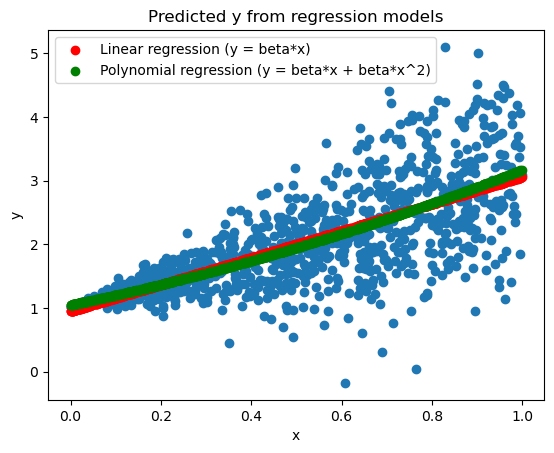

In [5]:
plt.scatter(x, y)
plt.scatter(x, y_pred, color='red', label='Linear regression (y = beta*x)')
plt.scatter(x, y_pred2, color='green', label='Polynomial regression (y = beta*x + beta*x^2)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predicted y from regression models')
plt.show()

In [6]:
print(y_pred.mean(),np.median(y_pred))
print(y_pred2.mean(),np.median(y_pred2))
print(y.mean(),np.median(y))

1.9854845077585734 1.993736294874084
1.9854845077585732 1.9404650057188237
1.9854845077585728 1.7809700302014113


In [7]:
# Perform quantile regression at 0.5 quantile
X = sm.add_constant(x)
mod = sm.QuantReg(y, X)
quantile_linear = 0.5
res = mod.fit(q=quantile_linear)
y_pred_quant = res.predict(X)

# Calculate MSE and MAE for quantile regression
mse_quant = mean_squared_error(y, y_pred_quant)
mae_quant = mean_absolute_error(y, y_pred_quant)

# Print results for quantile regression
print("Quantile Regression Results (Quantile = 0.5):")
print("MSE:", mse_quant)
print("MAE:", mae_quant)

# Add second feature x2
X2 = np.column_stack((X, x2))
mod2 = sm.QuantReg(y, X2)
res2 = mod2.fit(q=quantile_linear)
y_pred_quant2 = res2.predict(X2)

# Calculate MSE and MAE for model with x2
mse_quant_quad = mean_squared_error(y, y_pred_quant2)
mae_quant_quad = mean_absolute_error(y, y_pred_quant2)

# Print results for quadratic model with quantile regression
print("\nQuadratic Estimator Results - Quantile Regression (Quantile = 0.5):")
print("MSE:", mse_quant_quad)
print("MAE:", mae_quant_quad)

# Compare the estimators
print("\nComparison of Estimators - Quantile Regression:")
print("Linear vs Quadratic - MSE:", mse_quant - mse_quant_quad)
print("Linear vs Quadratic - MAE:", mae_quant - mae_quant_quad)

Quantile Regression Results (Quantile = 0.5):
MSE: 0.32843866617540085
MAE: 0.39670657209290966

Quadratic Estimator Results - Quantile Regression (Quantile = 0.5):
MSE: 0.32409186560232583
MAE: 0.3956019913363332

Comparison of Estimators - Quantile Regression:
Linear vs Quadratic - MSE: 0.004346800573075016
Linear vs Quadratic - MAE: 0.0011045807565764343


In [8]:
print(res.summary())
print(res2.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.3918
Model:                       QuantReg   Bandwidth:                      0.1901
Method:                 Least Squares   Sparsity:                       0.8169
Date:                Wed, 06 Mar 2024   No. Observations:                 1000
Time:                        18:51:05   Df Residuals:                      998
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0075      0.026     39.205      0.000       0.957       1.058
x1             1.9493      0.045     43.233      0.000       1.861       2.038
                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squ

In [9]:
print(y_pred_quant.mean(),np.median(y_pred_quant))
print(y_pred_quant2.mean(),np.median(y_pred_quant2))
print(y.mean(),np.median(y)) #why is there a bias?

1.9680410958015453 1.975664491967941
1.987594222066598 1.9642215897724262
1.9854845077585728 1.7809700302014113


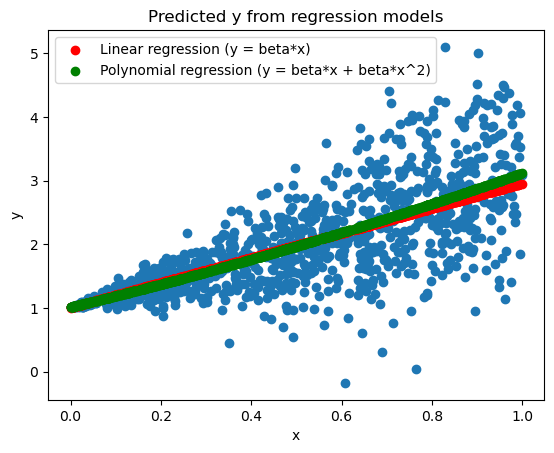

In [10]:
plt.scatter(x, y)
plt.scatter(x, y_pred_quant, color='red', label='Linear regression (y = beta*x)')
plt.scatter(x, y_pred_quant2, color='green', label='Polynomial regression (y = beta*x + beta*x^2)')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Predicted y from regression models')
plt.show()